# Particles are subject to collisions that cause them to split into two parts with each part a fraction of its parent

# Suppose that this fraction is uniformly distributed on $[0,1]$

# Following a single particle through several splits, we obtain a fraction of the original particle: $Z_{n} = X_{1}\cdot X_{2}\cdot...\cdot X_{n}$

# Show that the density of $Z_{n}$ is given by:

# $f_{Z{n}}(z) = \frac{1}{(n-1)!}(-log z)^{n-1}$


## *Hint: show that $Y_{k} = -logX_{k}$ is exponentially distributed. Use this so find the density of $S_{n} = Y_{1} + Y_{2} + ... + Y_{n}$ then from this get $Z_{n} = e^{-S_{n}}$*

________

# First, let's simulate the splits and compare the histogram to the plot of $f_{Z_{n}}$

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10
from math import factorial

In [27]:
n_splits = 10
n_trials = 10000

splits = np.random.random(size = [n_splits, n_trials])
Zn_samples = np.product(splits, axis = 0)

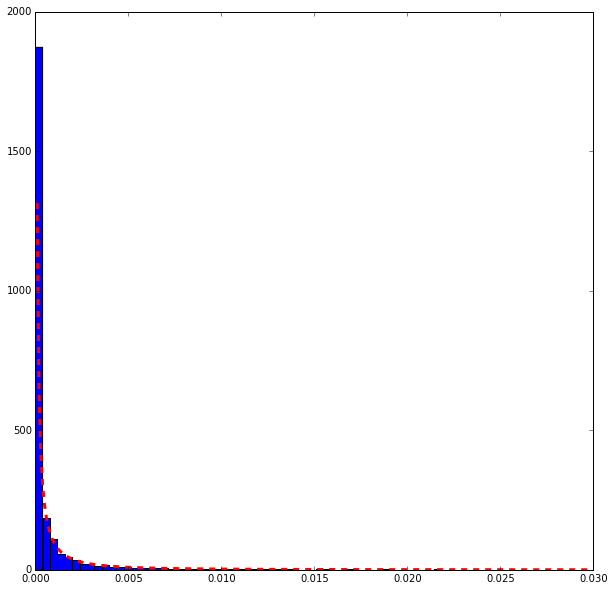

In [43]:
plt.hist(Zn_samples, bins = 300, normed = True)

z = np.arange(0.0001, 0.06, 0.0001)
fz = -((np.log(z))**9)/factorial(9)

plt.plot(z, fz, lw = 3, color = 'r', ls = 'dashed')

plt.xlim(0, 0.03)
plt.show()

_______

# Step one: $Y_{i} = -log X_{i}$

### From [Section 5.2](../5.2-important-densities/summary-of-chapter.ipynb), we know that if $X$ is a continuous random variable and $\phi(x)$ is a strictly monotonically *decreasing* function over the values of $X$ where $Y = \phi(X)$ then:

## $f_{Y}(y) = -f_{X}\left (\phi^{-1}(y) \right ) \frac{d}{dy}\phi^{-1}(y)$


### So in this case, $\phi(X) = -log(X) \implies \phi^{-1}(Y) = e^{-Y}$ and $f_{X}(x) = 1$ since it's uniform

### $\implies f_{Y_{i}}(y) = -(1)(-1)e^{-y} = e^{-y}$, and this is just the exponential density with $\lambda = 1$

_______

# Step two: $S{n} = Y_{1}+...+Y_{n}$

### We know from [Exercise 9](09-Solution.ipynb) that for exponentially distributed random variables $X_{1},...,X_{n}$:

## $f_{S_{n}} = \frac{\lambda e^{-\lambda x}(\lambda x)^{n-1}}{(n-1)!}$

### For the random variables describing the splits, this means $f_{S_{n}} = \frac{e^{-x}(x)^{n-1}}{(n-1)!}$

______

# Step three: $Z_{n} = e^{-S_{n}}$

## Again, this is a monotonically decreasing function so $f_{Z{n}} = -f_{S_{n}}(\phi^{-1}(z))\frac{d}{ds}\phi^{-1}(z)$

## $\phi(s) = e^{-s} \implies \phi^{-1}(z) = -log(z) \implies \frac{d}{ds}\phi^{-1}(z) = \frac{d}{ds}(-log(z)) = \frac{-1}{z}$

## $f_{S_{n}}(\phi^{-1}(z)) = \frac{e^{-(-log(z))}(-log(z))^{n-1}}{(n-1)!} = \frac{z(-log(z))^{n-1}}{(n-1)!}$

## $\implies -f_{S_{n}}(\phi^{-1}(z))\frac{d}{ds}\phi^{-1}(z) = -\frac{z(-log(z))^{n-1}}{(n-1)!} \frac{-1}{z} = \frac{(-log(z))^{n-1}}{(n-1)!}$